<a href="https://www.kaggle.com/code/shreyashjaiswalshrey/titanic-ml-prediction?scriptVersionId=127209060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing data

df = pd.read_csv("/kaggle/input/titanic/train.csv")

* Data Inspection and PreProcessing

In [3]:
#read that data

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#counting no. of males
df.Sex.value_counts().male

577

In [5]:
#counting no. of females
df.Sex.value_counts().female

314

In [6]:
#counting no. of people survived
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
#counting pclass 
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
#no. of siblings are there in the titanic
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.shape

(891, 12)

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
#checking for null values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
#total no. of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#counting NaN values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#checking for duplicated values
df.duplicated().sum()

0

<AxesSubplot:>

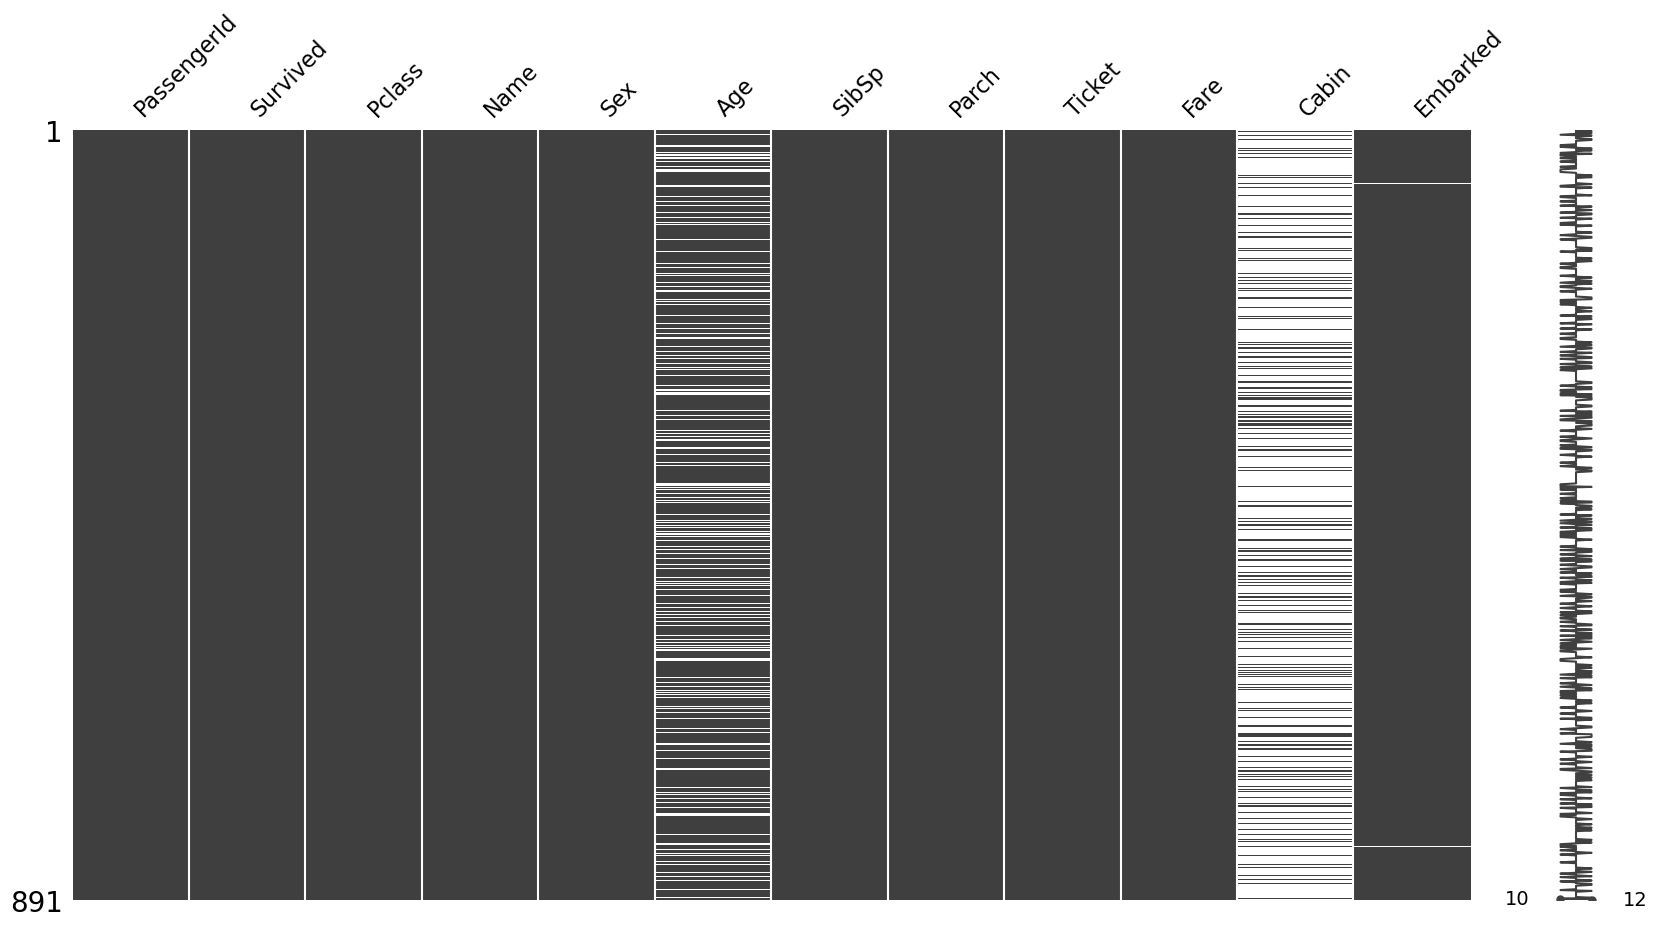

In [19]:
#Lets see Missingno Matrix
import missingno
missingno.matrix(df,figsize=(20,10))

* Missing Value Treatment

In [20]:
#Lets fill null  values with mean value of the dataset
Average_age=df['Age'].mean()
df['Age']=df['Age'].fillna(Average_age)
df['Age'].isnull().sum()

0

In [21]:
#lets drop the column we dont need or that will not affect our prediction
df.drop(columns=['Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


* exploratoryDataAnalysis

<AxesSubplot:xlabel='count', ylabel='Survived'>

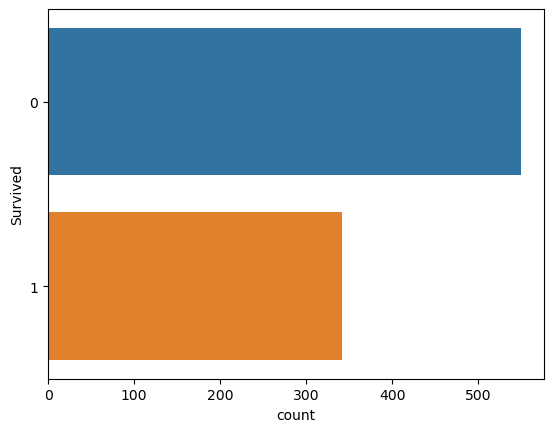

In [23]:
sns.countplot(y='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

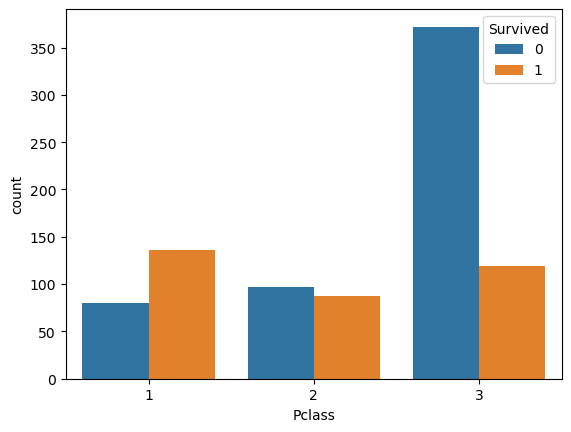

In [24]:
sns.countplot(x='Pclass',data=df,hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

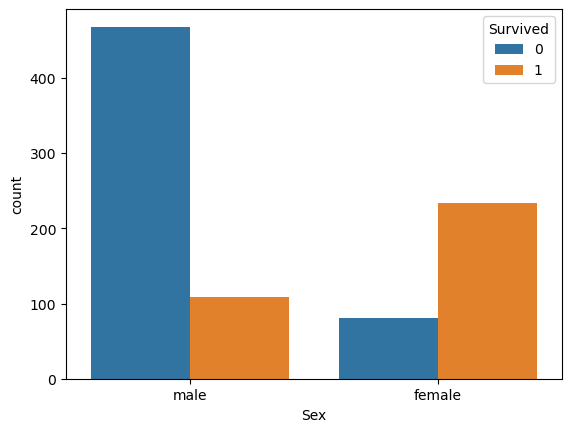

In [25]:
sns.countplot(x='Sex', data=df,hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

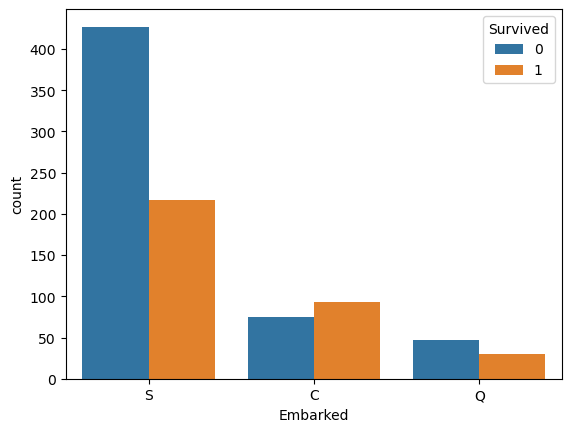

In [26]:
sns.countplot(x='Embarked',data=df,hue='Survived' )

<AxesSubplot:xlabel='Parch', ylabel='count'>

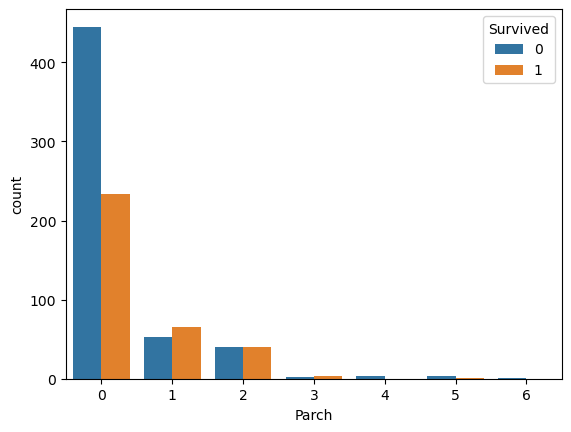

In [27]:
sns.countplot(x='Parch',data=df,hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

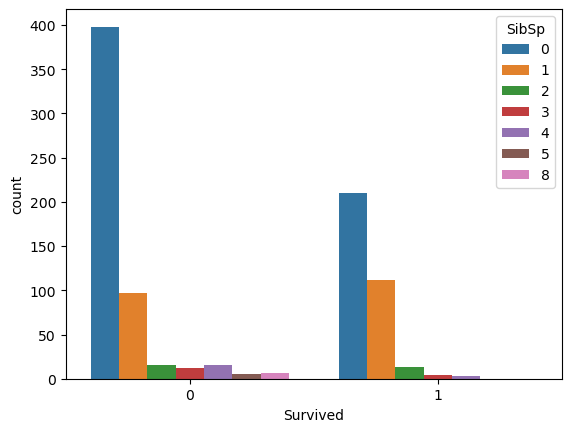

In [28]:
sns.countplot(x='Survived',data=df,hue='SibSp')

(array([ 30.,  17.,  15.,   9.,  29.,  64.,  67.,  70.,  83., 239.,  51.,
         40.,  35.,  27.,  35.,  23.,  15.,   9.,  11.,  11.,   4.,   2.,
          3.,   1.,   1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <BarContainer object of 25 artists>)

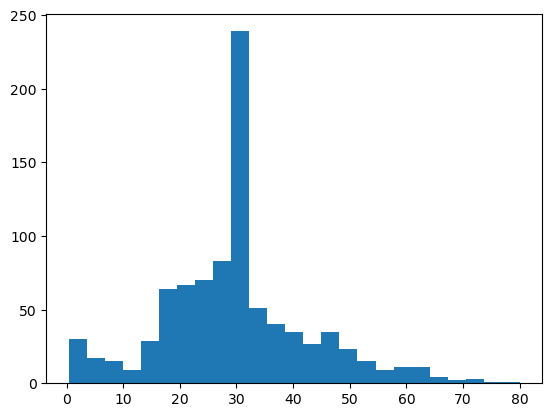

In [29]:
#histogram on age
plt.hist(df['Age'],bins=25)

* Encoding Categorical to numerical columns

In [30]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Sex']= LabelEncoder().fit_transform(df['Sex'])
df['Embarked']= LE.fit_transform(df['Embarked'])

In [31]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


* Model Building

In [32]:
#DataSplit
y=df['Survived']

X=df.drop(columns='Survived')


In [33]:
#Train-test-Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=42)


In [34]:
#model building
from sklearn.linear_model import LogisticRegression

LR_Model= LogisticRegression()



In [35]:
LR_Model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
#modelPrediction
y_predicted = LR_Model.predict(X_test)

In [37]:
y_predicted

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [38]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [39]:
#modelEvaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
LR_Model.score(X_test,y_test)

0.773109243697479

In [41]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       216
           1       0.74      0.65      0.69       141

    accuracy                           0.77       357
   macro avg       0.77      0.75      0.76       357
weighted avg       0.77      0.77      0.77       357



In [42]:
confusion_matrix(y_test,y_predicted)

array([[184,  32],
       [ 49,  92]])

* Test File

In [43]:
Test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [44]:
Test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
Test.drop(columns=['Name','Cabin','Ticket'],inplace=True)

In [46]:
Test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [47]:
Test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [48]:
T_average=Test['Age'].mean()
Test['Age'] = Test['Age'].fillna(T_average)
Test['Fare']=Test['Fare'].fillna(Test['Fare'].mean())

In [49]:
Test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [50]:
LE_T=LabelEncoder()

Test['Sex'] = LE_T.fit_transform(Test['Sex'])
Test['Embarked']=LE_T.fit_transform(Test['Embarked'])

In [51]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [52]:
#TestPrediction
predictions = LR_Model.predict(Test)

In [53]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
my_predictions = pd.DataFrame({'PassengerId': Test.PassengerId, 'Survived': predictions})

# predictions,index=[i for i in range(len(predictions))],columns=['Survived']

In [55]:
my_predictions

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
#toSaveYourFile
my_predictions.to_csv('Titanic Survivals Predictions001',index=False)
print("Your submission was successfully saved")

Your submission was successfully saved
